# Classifying Cifar-10 Dataset
---
Source - https://www.cs.toronto.edu/~kriz/cifar.html
---
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The labels are as follow :
1. airplane										
2. automobile										
3. bird										
4. cat										
5. deer										
6. dog										
7. frog										
8. horse										
9. ship										
10. truck

**Objective**: Classify the given image into one of the 10 given labels.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation, Reshape

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
labels = {0: "airplane",
          1: "automobile",
          2: "bird",
          3: "cat",
          4: "deer",
          5: "dog",
          6: "frog",
          7: "horse",
          8: "ship",
          9: "truck"}
          

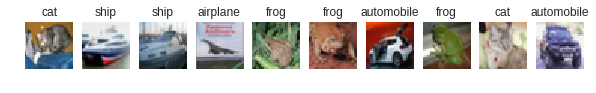

In [26]:
num_imgs = 10
plt.figure(figsize=(10,1))
for i in range(0, num_imgs):
  ax = plt.subplot(1, 10, i+1)
  plt.imshow(x_test[i])
  ax.set_title(str(labels[y_test[i][0]]))
  ax.axis("off")
plt.show()

In [0]:
num_classes = 10
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

## ConvNet

In [0]:
def createModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=x_train.shape[1:]))
  model.add(Conv2D(32, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation="softmax"))
  return model

In [30]:
model = createModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [0]:
epochs = 100
batch_size = 128
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                  validation_data=(x_test, y_test_one_hot),
                  shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 14s - loss: 1.9993 - acc: 0.2561 - val_loss: 1.6948 - val_acc: 0.3985
Epoch 2/100
 - 12s - loss: 1.6895 - acc: 0.3836 - val_loss: 1.6001 - val_acc: 0.4324
Epoch 3/100
 - 12s - loss: 1.5479 - acc: 0.4363 - val_loss: 1.4238 - val_acc: 0.4849
Epoch 4/100
 - 12s - loss: 1.4507 - acc: 0.4747 - val_loss: 1.3847 - val_acc: 0.5008
Epoch 5/100
 - 12s - loss: 1.3763 - acc: 0.5053 - val_loss: 1.2765 - val_acc: 0.5438
Epoch 6/100
 - 12s - loss: 1.3164 - acc: 0.5296 - val_loss: 1.2120 - val_acc: 0.5686
Epoch 7/100
 - 12s - loss: 1.2626 - acc: 0.5512 - val_loss: 1.1477 - val_acc: 0.5930
Epoch 8/100
 - 12s - loss: 1.2115 - acc: 0.5707 - val_loss: 1.1086 - val_acc: 0.6038
Epoch 9/100
 - 12s - loss: 1.1621 - acc: 0.5887 - val_loss: 1.0628 - val_acc: 0.6254
Epoch 10/100
 - 12s - loss: 1.1193 - acc: 0.6040 - val_loss: 1.0848 - val_acc: 0.6119
Epoch 11/100
 - 12s - loss: 1.0779 - acc: 0.6203 - val_loss: 0.9883 - val_acc: 0.6514
Epoch 12/100


 - 12s - loss: 0.6321 - acc: 0.7808 - val_loss: 0.7469 - val_acc: 0.7511
Epoch 33/100
 - 12s - loss: 0.6255 - acc: 0.7824 - val_loss: 0.7077 - val_acc: 0.7573
Epoch 34/100
 - 12s - loss: 0.6063 - acc: 0.7874 - val_loss: 0.7036 - val_acc: 0.7578
Epoch 35/100
 - 12s - loss: 0.5947 - acc: 0.7934 - val_loss: 0.6731 - val_acc: 0.7680
Epoch 36/100
 - 12s - loss: 0.5807 - acc: 0.7973 - val_loss: 0.6816 - val_acc: 0.7691
Epoch 37/100
 - 12s - loss: 0.5704 - acc: 0.8028 - val_loss: 0.6622 - val_acc: 0.7769
Epoch 38/100
 - 12s - loss: 0.5648 - acc: 0.8027 - val_loss: 0.6499 - val_acc: 0.7772
Epoch 39/100
 - 12s - loss: 0.5538 - acc: 0.8087 - val_loss: 0.6605 - val_acc: 0.7777
Epoch 40/100
 - 12s - loss: 0.5430 - acc: 0.8128 - val_loss: 0.6411 - val_acc: 0.7780
Epoch 41/100
 - 12s - loss: 0.5296 - acc: 0.8156 - val_loss: 0.6597 - val_acc: 0.7767
Epoch 42/100
 - 12s - loss: 0.5249 - acc: 0.8190 - val_loss: 0.6223 - val_acc: 0.7847
Epoch 43/100
 - 12s - loss: 0.5136 - acc: 0.8211 - val_loss: 0.6335

Epoch 66/100
 - 12s - loss: 0.3744 - acc: 0.8719 - val_loss: 0.6155 - val_acc: 0.8004
Epoch 67/100
 - 12s - loss: 0.3641 - acc: 0.8738 - val_loss: 0.6429 - val_acc: 0.7988
Epoch 68/100
 - 12s - loss: 0.3658 - acc: 0.8750 - val_loss: 0.6449 - val_acc: 0.7956
Epoch 69/100
 - 12s - loss: 0.3628 - acc: 0.8755 - val_loss: 0.6005 - val_acc: 0.8041
Epoch 70/100
 - 12s - loss: 0.3638 - acc: 0.8748 - val_loss: 0.5985 - val_acc: 0.8054
Epoch 71/100
 - 12s - loss: 0.3554 - acc: 0.8791 - val_loss: 0.6344 - val_acc: 0.7997
Epoch 72/100
 - 12s - loss: 0.3587 - acc: 0.8777 - val_loss: 0.6341 - val_acc: 0.8023
Epoch 73/100
 - 12s - loss: 0.3521 - acc: 0.8810 - val_loss: 0.6099 - val_acc: 0.8046
Epoch 74/100
 - 12s - loss: 0.3528 - acc: 0.8789 - val_loss: 0.6080 - val_acc: 0.8056
Epoch 75/100
 - 12s - loss: 0.3395 - acc: 0.8844 - val_loss: 0.6156 - val_acc: 0.8029
Epoch 76/100
 - 12s - loss: 0.3427 - acc: 0.8835 - val_loss: 0.6210 - val_acc: 0.8036
Epoch 77/100
 - 12s - loss: 0.3404 - acc: 0.8838 - val

Epoch 100/100
 - 12s - loss: 0.3216 - acc: 0.8933 - val_loss: 0.5912 - val_acc: 0.8108


Loss: 0.5912
Accuracy: 81.08%

In [0]:
model.save('cifar-10-model_1.h5')

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred_label = np.argmax(y_pred, axis=1)

## Confusion Matrix

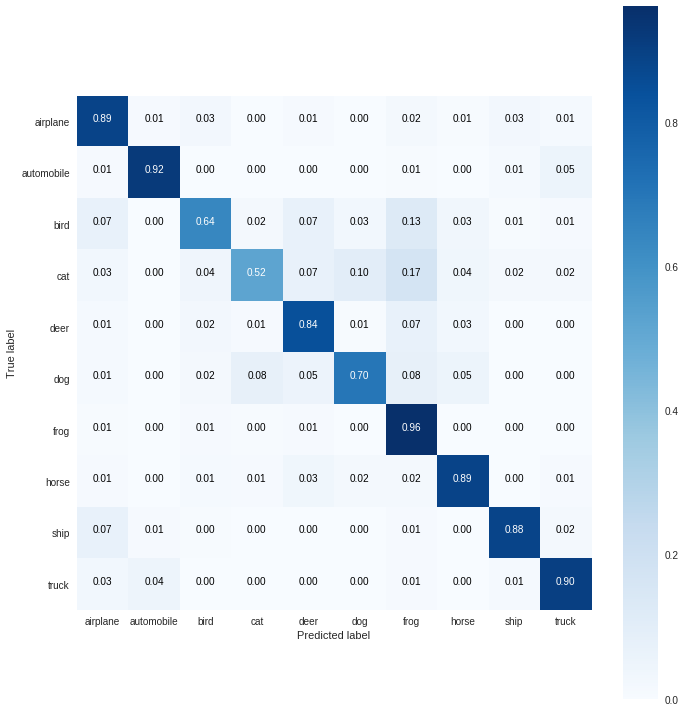

In [83]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

Text(0.5,1,'Accuracy Curves')

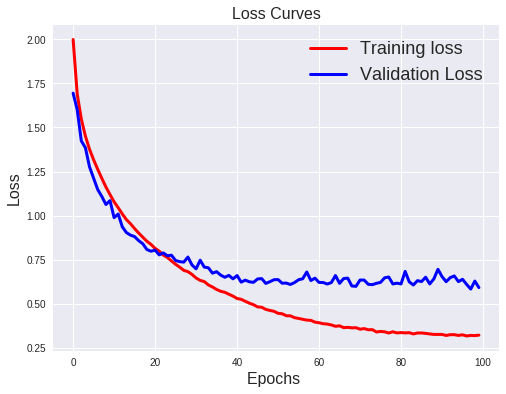

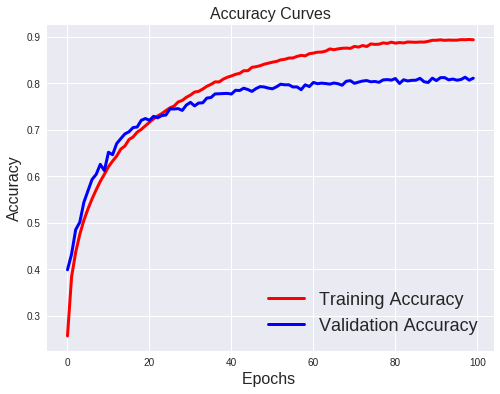

In [84]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Prediction

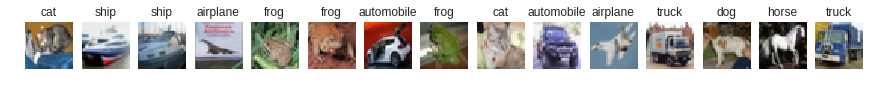

In [92]:
num_imgs = 15
plt.figure(figsize=(15,1))
for i in range(0, num_imgs):
  ax = plt.subplot(1, 15, i+1)
  plt.imshow(x_test[i])
  ax.set_title(str(labels[y_pred_label[i]]))
  ax.axis("off")
plt.show()